In [1]:
import pandas as pd
import seaborn
import matplotlib

In [2]:
df = pd.read_csv('./data/medical_costs.csv')

In [3]:
df.shape

(1338, 7)

In [4]:
df.head(10)

,Age,Gender,BMI,Children,Tobacco,Area,Cost
0,19,F,27.900,0,yes,SW,16884.92400
1,18,M,33.770,1,no,SE,1725.55230
2,28,M,33.000,3,no,SE,4449.46200
3,33,M,22.705,0,no,NW,21984.47061
4,32,M,28.880,0,no,NW,3866.85520
5,31,F,25.740,0,no,SE,3756.62160
6,46,F,33.440,1,no,SE,8240.58960
7,37,F,27.740,3,no,NW,7281.50560
8,37,M,29.830,2,no,NE,6406.41070
9,60,F,25.840,0,no,NW,28923.13692


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
Gender,1338,2,M,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMI,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
Children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
Tobacco,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area,1338,4,SE,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cost,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


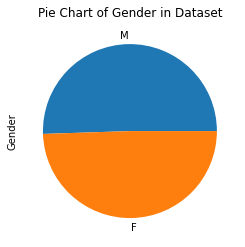

In [6]:
plot1 = df["Gender"].value_counts().plot(kind='pie', title="Pie Chart of Gender in Dataset")

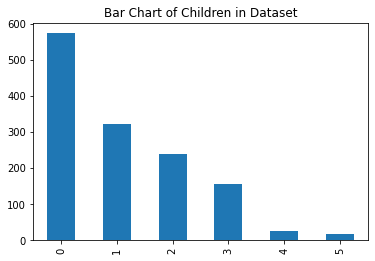

In [7]:
plot2 = df["Children"].value_counts().plot(kind='bar', title="Bar Chart of Children in Dataset")

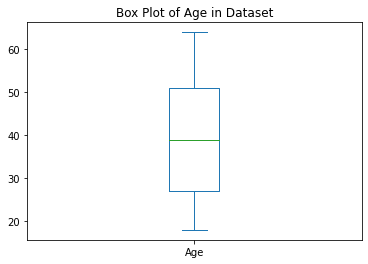

In [8]:
plot3 = df["Age"].plot(kind="box", title="Box Plot of Age in Dataset")

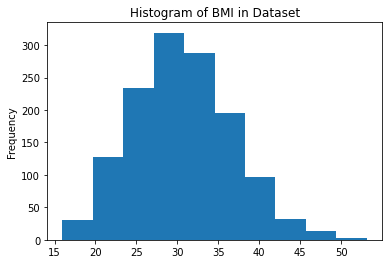

In [9]:
plot4 = df["BMI"].plot(kind="hist", title="Histogram of BMI in Dataset")

<AxesSubplot:title={'center':'Histogram of BMI in Dataset'}, ylabel='Frequency'>

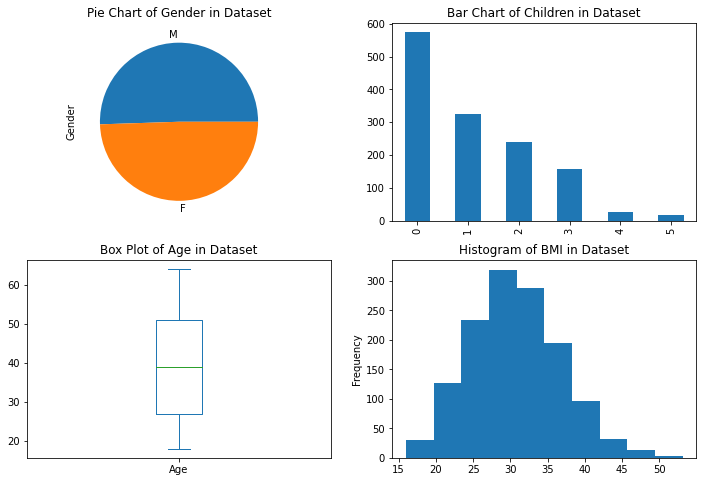

In [10]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

df["Gender"].value_counts().plot(kind='pie', title="Pie Chart of Gender in Dataset", ax=axs[0,0])
df["Children"].value_counts().plot(kind='bar', title="Bar Chart of Children in Dataset", ax=axs[0, 1])
df["Age"].plot(kind="box", title="Box Plot of Age in Dataset", ax=axs[1, 0])
df["BMI"].plot(kind="hist", title="Histogram of BMI in Dataset", ax=axs[1, 1])


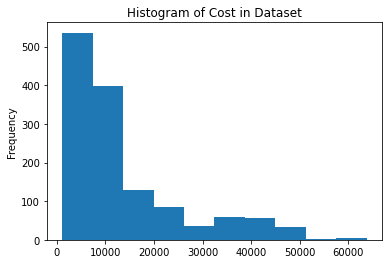

In [11]:
plot5 = df["Cost"].plot(kind="hist", title="Histogram of Cost in Dataset")

In [12]:
df.isna().sum()

Age         0
Gender      0
BMI         0
Children    0
Tobacco     0
Area        0
Cost        0
dtype: int64

In [13]:
df_transformed = pd.get_dummies(df, columns=['Gender', 'Tobacco', 'Area'], drop_first=True)


In [14]:
df_transformed.head()


,Age,BMI,Children,Cost,Gender_M,Tobacco_yes,Area_NW,Area_SE,Area_SW
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [15]:
df_transformed.shape

(1338, 9)

In [16]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

df_transformed[['Age', 'BMI', 'Children', 'Cost']] = scaler.fit_transform(df_transformed[['Age', 'BMI', 'Children', 'Cost']])


In [17]:
df_transformed.head()

,Age,BMI,Children,Cost,Gender_M,Tobacco_yes,Area_NW,Area_SE,Area_SW
0,0.021739,0.321227,0.0,0.251611,0,1,0,0,1
1,0.000000,0.479150,0.2,0.009636,1,0,0,1,0
2,0.217391,0.458434,0.6,0.053115,1,0,0,1,0
3,0.326087,0.181464,0.0,0.333010,1,0,1,0,0
4,0.304348,0.347592,0.0,0.043816,1,0,1,0,0


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_transformed[df_transformed.columns[~df_transformed.columns.isin(['Cost'])]], df_transformed['Cost'], test_size=0.25, random_state=0)



In [19]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth=4)

dtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [20]:
from sklearn import tree

text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_4 <= 0.50
|   |--- feature_0 <= 0.53
|   |   |--- feature_0 <= 0.18
|   |   |   |--- feature_2 <= 0.30
|   |   |   |   |--- value: [0.04]
|   |   |   |--- feature_2 >  0.30
|   |   |   |   |--- value: [0.08]
|   |   |--- feature_0 >  0.18
|   |   |   |--- feature_0 <= 0.32
|   |   |   |   |--- value: [0.07]
|   |   |   |--- feature_0 >  0.32
|   |   |   |   |--- value: [0.10]
|   |--- feature_0 >  0.53
|   |   |--- feature_0 <= 0.88
|   |   |   |--- feature_0 <= 0.73
|   |   |   |   |--- value: [0.15]
|   |   |   |--- feature_0 >  0.73
|   |   |   |   |--- value: [0.19]
|   |   |--- feature_0 >  0.88
|   |   |   |--- feature_2 <= 0.70
|   |   |   |   |--- value: [0.22]
|   |   |   |--- feature_2 >  0.70
|   |   |   |   |--- value: [0.57]
|--- feature_4 >  0.50
|   |--- feature_1 <= 0.38
|   |   |--- feature_0 <= 0.50
|   |   |   |--- feature_0 <= 0.03
|   |   |   |   |--- value: [0.24]
|   |   |   |--- feature_0 >  0.03
|   |   |   |   |--- value: [0.29]
|   |   |--- featu

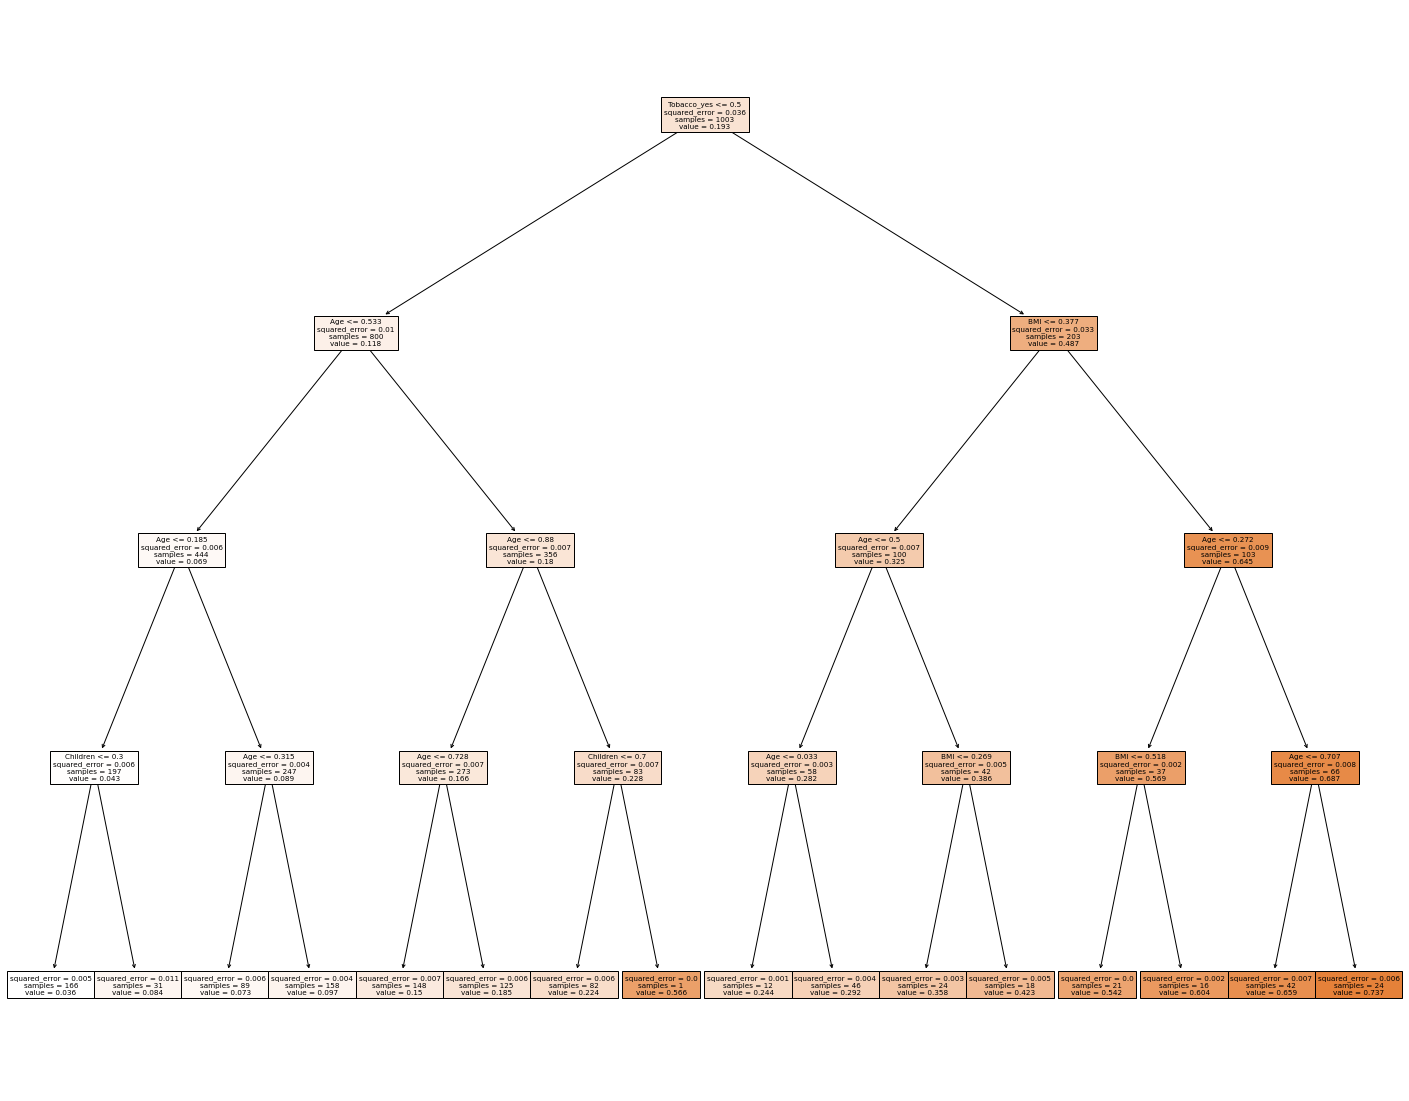

In [21]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=x_train.columns,
                   filled=True)

In [23]:
pip3 install torch==1.12+cpu torchvision==0.13.0+cpu torchtext==0.13.0 -f "https://download.pytorch.org/whl/cpu/torch_stable.html"

SyntaxError: invalid syntax (3688587461.py, line 1)

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
rforest = RandomForestRegressor(max_depth=4, random_state=0)
rforest.fit(x_train, y_train)

RandomForestRegressor(max_depth=4, random_state=0)

In [24]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, rforest.predict(x_test))

0.0040066200896682795

In [25]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, dtree.predict(x_test))

0.004030931553005825

In [26]:
pip install autogluon

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor
predictor = TabularPredictor(label='Cost').fit(train_data=df_transformed)

No path specified. Models will be saved in: "AutogluonModels/ag-20221203_180539/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20221203_180539/"
AutoGluon Version:  0.6.0
Python Version:     3.9.15
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 21.4.0: Fri Mar 18 00:45:05 PDT 2022; root:xnu-8020.101.4~15/RELEASE_X86_64
Train Data Rows:    1338
Train Data Columns: 8
Label Column: Cost
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (0.9999999999999999, 0.0, 0.19392, 0.1933)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatur